# Design Choices in Convolutional Neural Networks

###  Importing packages

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
import timeit

import warnings
warnings.filterwarnings('ignore')

### Preparing Dataset

In [7]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Part 1: Influence of convolution size

Try the models with different convolution sizes 5x5, 7x7 and 9x9 etc.

Analyze the number of model parameters, accuracy and training time

### Model with (3 x 3) Convolution

In [8]:
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                294944    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 2.2824 - accuracy: 0.1326 - val_loss: 2.

### Try models with different Convolution sizes

In [9]:
# 5×5 
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 16)        3216      
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                204832    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 208,586
Trainable params: 208,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 44s 93ms/step - loss: 2.2779 - accuracy: 0.1927 - val_loss: 2.

In [10]:
# 7×7
K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (7, 7), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 8)         400       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        6288      
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                131104    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 138,122
Trainable params: 138,122
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 52s 111ms/step - loss: 2.2963 - accuracy: 0.1157 - val_loss: 2

In [11]:
# 9×9 

K.clear_session()
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(9, 9), activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (9, 9), activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 8)         656       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        10384     
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                73760     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 85,130
Trainable params: 85,130
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 2.3042 - accuracy: 0.1034 - val_loss: 2.2

### Write your findings about activations here?

1.   Finding 1
2.   Finding 2



```
3×3
loss: 0.7997 - accuracy: 0.8111 - val_loss: 0.7060 - val_accuracy: 0.8302
321.55315578399996 seconds

5×5
loss: 0.9196 - accuracy: 0.7893 - val_loss: 0.8088 - val_accuracy: 0.8137
435.60148787599974 seconds

7×7
loss: 0.8276 - accuracy: 0.8013 - val_loss: 0.7405 - val_accuracy: 0.8157
520.3141176230001 seconds

9×9
loss: 1.1798 - accuracy: 0.6935 - val_loss: 1.0678 - val_accuracy: 0.7282
525.3110400850001 seconds

```




In [13]:
import pandas as pd

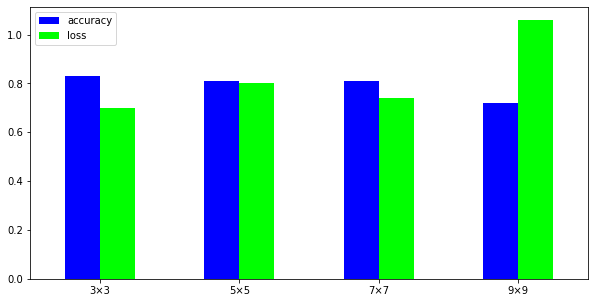

In [14]:
colors = [ 'blue', 'lime'] 


accCS= [0.83,0.81,0.81,0.72]
lossCS = [0.70,0.80,0.74,1.06]
indexCS = ["3×3","5×5","7×7","9×9"]
df = pd.DataFrame({'accuracy': accCS,
                   'loss': lossCS}, index=indexCS)
ax = df.plot.bar(rot=0,figsize=(10,5),color=colors)



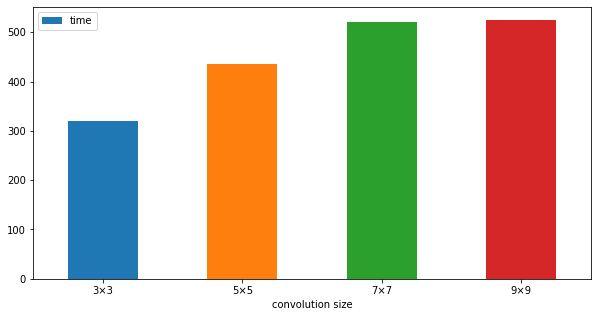

In [15]:
clr=['C0', 'C1', 'C2', 'C3', 'C4','C5','C6','C7','C8']

timeCS  =[ 321,435,520,525 ]
indexCS = ["3×3","5×5","7×7","9×9"]


df = pd.DataFrame({"convolution size": indexCS,
                   "time": timeCS })

ax = df.plot.bar(x="convolution size", y="time", rot=0,color=clr,figsize=(10,5))



## Part 2: Influence of Striding

Try the models with different stride sizes such as 2,3,4 etc.

Analyze the number of model parameters, accuracy and training time

### Model with Convolution with 2 Steps

In [16]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=2, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 13, 13, 8)         80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                18464     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 20,042
Trainable params: 20,042
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 2.3201 - accuracy: 0.0880 - val_loss: 2.3

In [17]:
# Stride=3

start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=3, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=3, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 9, 9, 8)           80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 16)          1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4640      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 6,218
Trainable params: 6,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.3127 - accuracy: 0.0713 - val_loss: 2.3110

In [18]:
# Stride=4

start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=4, activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=4, activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 7, 7, 8)           80        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 16)          1168      
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 3,658
Trainable params: 3,658
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 2.3001 - accuracy: 0.1168 - val_loss: 2.2987

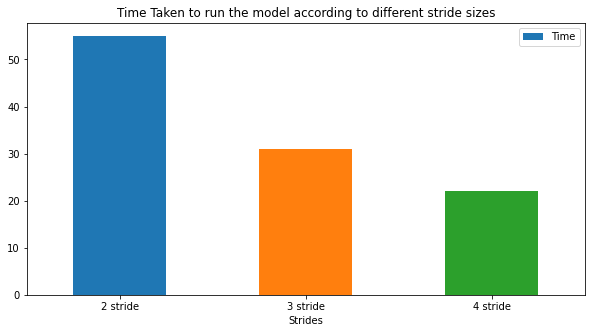

In [29]:
clr=['C0', 'C1', 'C2', 'C3']

timeS  =[ 55,31,22 ]
indexS= ["2 stride","3 stride","4 stride"]


df = pd.DataFrame({"Strides": indexS,
                   "Time": timeS })

ax = df.plot.bar(x="Strides", y="Time", rot=0,color=clr,figsize=(10,5)
                  ,title='Time Taken to run the model according to different stride sizes')


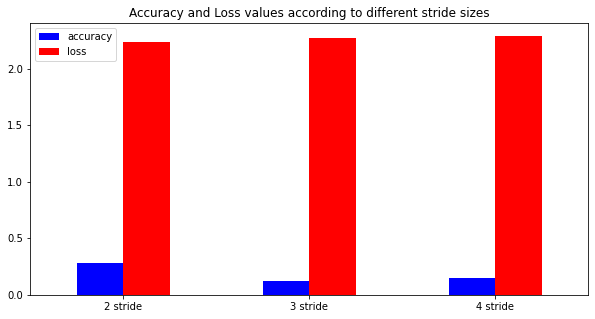

In [28]:
colors = [ 'blue', 'red'] 


accS= [0.28,0.12,0.15]
lossS = [2.24,2.27,2.29]
indexS = ["2 stride","3 stride","4 stride"]
df = pd.DataFrame({'accuracy': accS,
                   'loss': lossS}, index=indexS)
ax = df.plot.bar(rot=0,figsize=(10,5),color=colors,
                 title='Accuracy and Loss values according to different stride sizes')

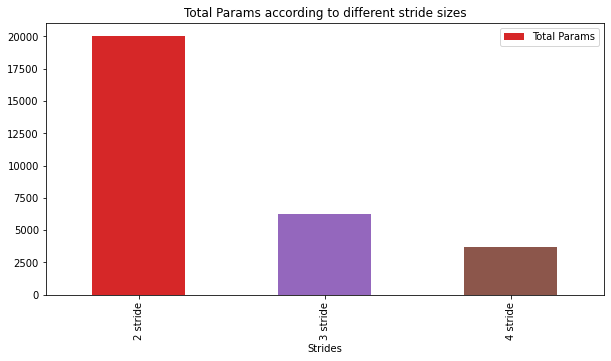

In [27]:
clr=['C3', 'C4', 'C5']

paramS  =[ 20042,6218,3658 ]
indexS= ["2 stride","3 stride","4 stride"]


df = pd.DataFrame({"Total Params": paramS,
                   "Strides": indexS })

ax = df.plot.bar(x="Strides", y="Total Params",color=clr,figsize=(10,5),title='Total Params according to different stride sizes')

### Write your findings about influence of striding here?

1.   Finding 1
2.   Finding 2




```
stride=2
Total params: 20,042
loss: 2.2545 - accuracy: 0.2560 - val_loss: 2.2468 - val_accuracy: 0.2809
Time Taken to run the model: 55.66053261199977 seconds

stride=3
Total params: 6,218
loss: 2.2819 - accuracy: 0.1217 - val_loss: 2.2797 - val_accuracy: 0.1223
Time Taken to run the model: 31.717295687999467 seconds

stride=4
Total params: 3,658
loss: 2.2934 - accuracy: 0.1383 - val_loss: 2.2916 - val_accuracy: 0.1516
Time Taken to run the model: 22.80477492599948 seconds
```



## Part 3: Influence of Padding

Try the models with padding and without padding.

Analyze the number of model parameters, accuracy and training time

### Model with (3 x 3) Convolution with Same Padding

In [22]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                401440    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 403,018
Trainable params: 403,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 41s 86ms/step - loss: 2.2893 - accuracy: 0.0962 - val_loss: 

In [26]:
# Write your code here. Use the same architecture as above. 
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=input_shape))
model.add(Conv2D(16, (3, 3), strides=1, padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                294944    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 296,522
Trainable params: 296,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 33s 69ms/step - loss: 2.2604 - accuracy: 0.2239 - val_loss: 

In [ ]:
# Write your code here. Use the same architecture as above. 



### Write your findings about influence of padding here?

1.   The addition of padding, extends model training time.
2.   We train more parameters in the model,if we use padding.


```
with padding 
Total params: 403,018
loss: 0.8500 - accuracy: 0.7950 - val_loss: 0.7288 - val_accuracy: 0.8281
Time Taken to run the model: 405.4889961709996 seconds

without padding
Total params: 296,522
loss: 0.6711 - accuracy: 0.8357 - val_loss: 0.6025 - val_accuracy: 0.8540
Time Taken to run the model: 323.45096540800023 seconds
```




## Part 4: Influence of Pooling

Try the models with different pooling window sizes such as 2x2, 3x3, 4x4 etc.

Analyze the number of model parameters, accuracy and training time

### Model with (3 x 3) Convolution with Pooling (2 x 2) 

In [30]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                12832     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

### Model with (3 x 3) Convolution with Pooling (3 x 3) 

In [31]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")  

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

### Model with (3 x 3) Convolution with Pooling (4 x 4) 

In [32]:
start = timeit.default_timer()   
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds") 

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 16)          1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 16)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

### Write your findings about influence of pooling here?

1.   if you increase the pooling size,model accuracy getting lower and number of total parameters that we learn decreases
2.   if your model has small size of pooling, computation time will be high.



```
Model with (3 x 3) Convolution with Pooling (2 x 2)
Total params: 14,410
loss: 2.2165 - accuracy: 0.1808 - val_loss: 2.2058 - val_accuracy: 0.2001
Time Taken to run the model: 176.40380293500039 seconds

Model with (3 x 3) Convolution with Pooling (3 x 3)
Total params: 3,658
loss: 2.2968 - accuracy: 0.1367 - val_loss: 2.2956 - val_accuracy: 0.1423
Time Taken to run the model: 142.85254495199842 seconds

Model with (3 x 3) Convolution with Pooling (4 x 4)
Total params: 2,122
loss: 2.3184 - accuracy: 0.0869 - val_loss: 2.3151 - val_accuracy: 0.0898
Time Taken to run the model: 133.84468112099967 seconds


```


